<a href="https://colab.research.google.com/github/JuhiAmeta/COVID-NLP/blob/main/covid_wordcloud_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#### Processing Complete dataset for wordcloud and lda

import pandas as pd
import re
import nltk
import string
import numpy as np
pd.options.mode.chained_assignment = None

df = pd.read_csv(r"D:\PHD- SYMBIOSIS-2019\COVID-19-SURVEY\COVID-19-SEPT\Combined_corona_dataset.dwnld.csv", encoding ="latin-1")
"""df = full_df[["Text","Claim"]]"""
df["Text"] = df["Text"].astype(str)
df["Claim"]= df["Claim"].astype(str)
df['final'] = df['Claim'].str.cat(df['Text'], sep =" ") 

df.head()


,Claim,Text,Author,Published_Date\n(dd/mm/yyyy),Accessed_Date\n(dd/mm/yyyy),URL,URL Count,Summary,Investigation,Investigated from,Claim_Supporting_Agency_present,Occurrenceofauthwordsintitle,Occurrenceofauthwordsintext,Label,final
0,"""Biggest wake up call ever If your child gets ...","""Biggest wake up call ever If your child gets ...",http://archive.is/zT8W5,25-03-2020,NaN,http://archive.is/zT8W5,0.0,This Facebook post claims that If children con...,If a child contracts COVID-19 and is hospitali...,"Lead Stories, Prisma Health Children's Hospitals",0.0,0.0,0.0,False,"""Biggest wake up call ever If your child gets ..."
1,"""health bulletin"" about the new coronavirus ou...","Most Urgent,Very Serious, Important informatio...",The Great Amritsar,28-01-2020,10-04-2020,http://archive.is/ISzJ3#selection-1617.0-1617.18,0.0,Prevention method is to keep your throat moist...,Neither the printed email nor the viral Facebo...,CDC,0.0,0.0,0.0,False,"""health bulletin"" about the new coronavirus ou..."
2,"""The NIH researched chloroquine and concluded ...","""the NIH researched chloroquine and concluded ...",Bryan Fischer,17-04-2020,18-04-2020,https://archive.fo/0ItsH,0.0,This claim is about the use of chloroquine and...,The claim that chloroquine is a cure against S...,NIH,0.0,1.0,1.0,False,"""The NIH researched chloroquine and concluded ..."
3,"""THEY CAN'T STOP THIS INFORMATION !!! DR RASHI...",social distancing guidelines promoted by the U...,bizarre,09-07-2020,NaN,https://www.youtube.com/watch?v=grjwkQ2o7Wo,NaN,The government does have a real reason to enco...,The government does have a real reason to enco...,NaN,NaN,NaN,NaN,False,"""THEY CAN'T STOP THIS INFORMATION !!! DR RASHI..."
4,Maskne Is the Latest Skin Problem  Heres H...,Health experts agree that wearing a mask is on...,"Jessica Migala, Ross Radusky, MD - everydayhea...",07-08-2020,NaN,https://www.everydayhealth.com/acne/maskne-is-...,NaN,NaN,NaN,everydayhealth.com,NaN,NaN,NaN,True,Maskne Is the Latest Skin Problem  Heres H...


In [ ]:
# Load the regular expression library
import re

# Remove punctuation
df['final_processed'] = df['final'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['final_processed'] = df['final'].map(lambda x: x.lower())

# Print out the first rows of papers
df['final_processed'].head()

0    "biggest wake up call ever if your child gets ...
1    "health bulletin" about the new coronavirus ou...
2    "the nih researched chloroquine and concluded ...
3    "they can't stop this information !!! dr rashi...
4    maskne is the latest skin problem  heres h...
Name: final_processed, dtype: object

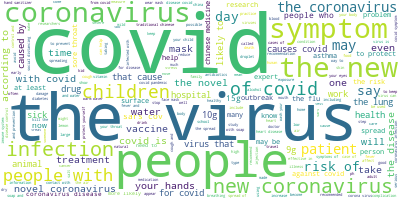

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['final_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

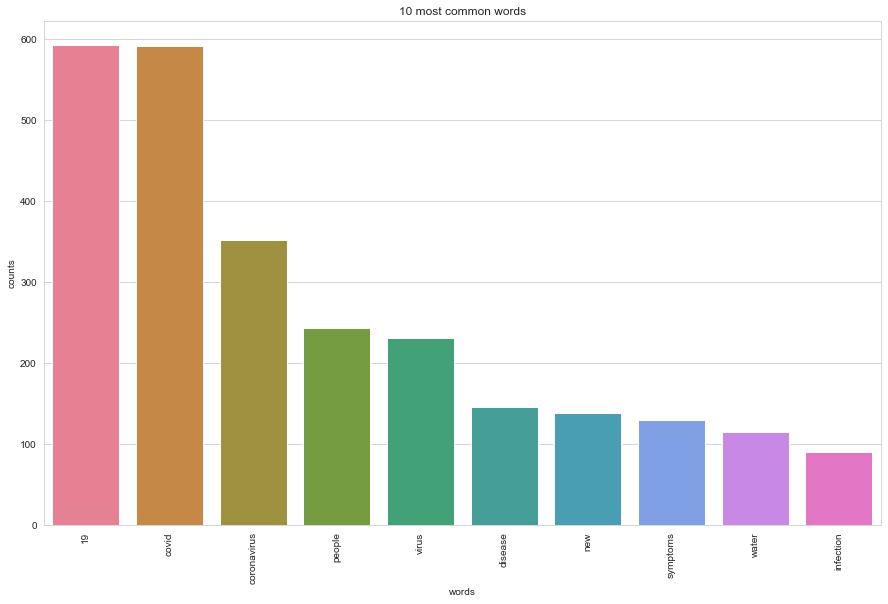

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['final_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
##### Processing True samples for wordcloud and lda

df = pd.read_csv(r"D:\PHD- SYMBIOSIS-2019\COVID-19-SURVEY\COVID-19-SEPT\Combined_corona_dataset-true.csv", encoding ="latin-1")
"""df = full_df[["Text","Claim"]]"""
df["Text"] = df["Text"].astype(str)
df["Claim"]= df["Claim"].astype(str)
df['final'] = df['Claim'].str.cat(df['Text'], sep =" ") 

df.head()


,Claim,Text,Author,Published_Date\n(dd/mm/yyyy),Accessed_Date\n(dd/mm/yyyy),URL,URL Count,Summary,Investigation,Investigated from,Claim_Supporting_Agency_present,Occurrenceofauthwordsintitle,Occurrenceofauthwordsintext,Label,final
0,Maskne Is the Latest Skin Problem  Heres H...,Health experts agree that wearing a mask is on...,"Jessica Migala, Ross Radusky, MD - everydayhea...",07-08-2020,NaN,https://www.everydayhealth.com/acne/maskne-is-...,NaN,NaN,NaN,everydayhealth.com,NaN,NaN,NaN,True,Maskne Is the Latest Skin Problem  Heres H...
1,5G mobile networks DO NOT spread COVID-19,Viruses cannot travel on radio waves/mobile ne...,WHO,08-04-2020,15-04-2020,https://www.who.int/emergencies/diseases/novel...,0.0,5G mobile networks DO NOT spread COVID-19,Viruses cannot travel on radio waves/mobile ne...,WHO,1.0,0.0,0.0,True,5G mobile networks DO NOT spread COVID-19 Viru...
2,6 Feet May Not Be Enough: Wind May Carry Coron...,New research indicates that droplets containin...,"Brian Krans , Jennifer Chesak - healthline.com",19-05-2020,NaN,https://www.healthline.com/health-news/covid-1...,NaN,NaN,NaN,healthline.com,NaN,NaN,NaN,True,6 Feet May Not Be Enough: Wind May Carry Coron...
3,A distance of at least 1 meter is necessary to...,"Because of the growing coronavirus pandemic, s...","Ministry of Health and Family Welfare (MoHFW),...",29-01-2020,16-04-2020,https://www.mohfw.gov.in/pdf/Protectivemeasure...,0.0,This is a preventive measure recommended by Go...,"Because of the growing coronavirus pandemic, s...","Ministry of Health and Family Welfare (MoHFW),...",1.0,0.0,0.0,True,A distance of at least 1 meter is necessary to...
4,Adding pepper to your soup or other meals DOES...,"Hot peppers in your food, though very tasty, c...",WHO,27-04-2020,24-06-2020,https://www.who.int/emergencies/diseases/novel...,NaN,"Hot peppers in your food, though very tasty, c...","Hot peppers in your food, though very tasty, c...",WHO,NaN,NaN,NaN,True,Adding pepper to your soup or other meals DOES...


In [ ]:
# Load the regular expression library
import re

# Remove punctuation
df['final_processed'] = df['final'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['final_processed'] = df['final'].map(lambda x: x.lower())

# Print out the first rows of papers
df['final_processed'].head()

0    maskne is the latest skin problem  heres h...
1    5g mobile networks do not spread covid-19 viru...
2    6 feet may not be enough: wind may carry coron...
3    a distance of at least 1 meter is necessary to...
4    adding pepper to your soup or other meals does...
Name: final_processed, dtype: object

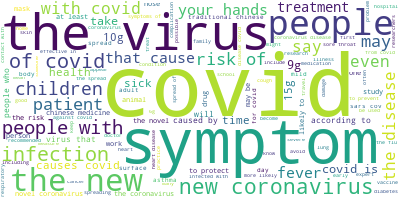

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['final_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

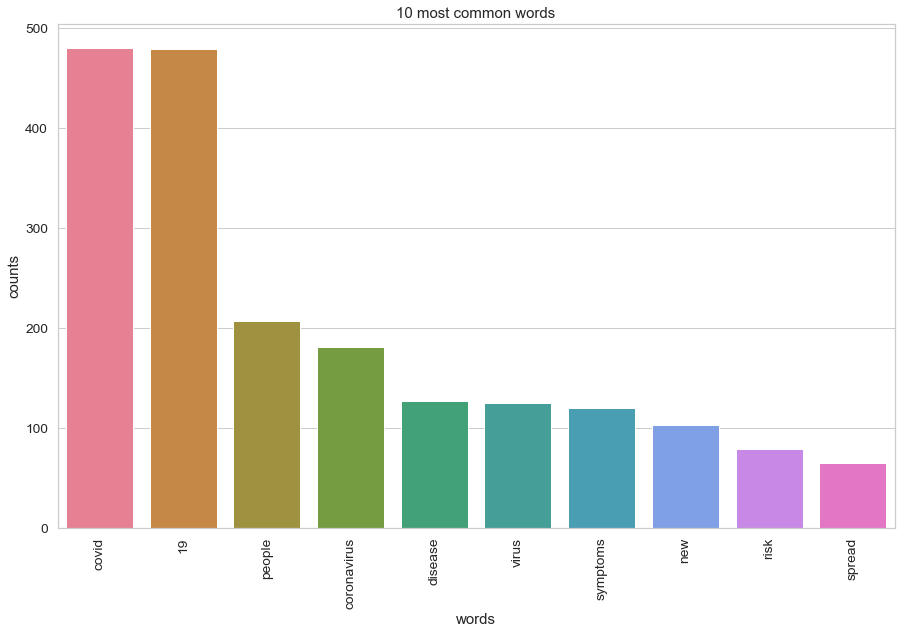

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['final_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
##### Processing Fake samples for wordcloud and lda

df = pd.read_csv(r"D:\PHD- SYMBIOSIS-2019\COVID-19-SURVEY\COVID-19-SEPT\Combined_corona_dataset-false.csv", encoding ="latin-1")
"""df = full_df[["Text","Claim"]]"""
df["Text"] = df["Text"].astype(str)
df["Claim"]= df["Claim"].astype(str)
df['final'] = df['Claim'].str.cat(df['Text'], sep =" ") 

df.head()


,Claim,Text,Author,Published_Date\n(dd/mm/yyyy),Accessed_Date\n(dd/mm/yyyy),URL,URL Count,Summary,Investigation,Investigated from,Claim_Supporting_Agency_present,Occurrenceofauthwordsintitle,Occurrenceofauthwordsintext,Label,final
0,"""Biggest wake up call ever If your child gets ...","""Biggest wake up call ever If your child gets ...",http://archive.is/zT8W5,25-03-2020,NaN,http://archive.is/zT8W5,0.0,This Facebook post claims that If children con...,If a child contracts COVID-19 and is hospitali...,"Lead Stories, Prisma Health Children's Hospitals",0.0,0.0,0.0,False,"""Biggest wake up call ever If your child gets ..."
1,"""health bulletin"" about the new coronavirus ou...","Most Urgent,Very Serious, Important informatio...",The Great Amritsar,28-01-2020,10-04-2020,http://archive.is/ISzJ3#selection-1617.0-1617.18,0.0,Prevention method is to keep your throat moist...,Neither the printed email nor the viral Facebo...,CDC,0.0,0.0,0.0,False,"""health bulletin"" about the new coronavirus ou..."
2,"""The NIH researched chloroquine and concluded ...","""the NIH researched chloroquine and concluded ...",Bryan Fischer,17-04-2020,18-04-2020,https://archive.fo/0ItsH,0.0,This claim is about the use of chloroquine and...,The claim that chloroquine is a cure against S...,NIH,0.0,1.0,1.0,False,"""The NIH researched chloroquine and concluded ..."
3,"""THEY CAN'T STOP THIS INFORMATION !!! DR RASHI...",social distancing guidelines promoted by the U...,bizarre,09-07-2020,NaN,https://www.youtube.com/watch?v=grjwkQ2o7Wo,NaN,The government does have a real reason to enco...,The government does have a real reason to enco...,NaN,NaN,NaN,NaN,False,"""THEY CAN'T STOP THIS INFORMATION !!! DR RASHI..."
4,1. If the coronavirus falls on a metal surface...,Lifespan of coronavirus outside the human body...,twitter account of Irosha sandamali@SandamaliI...,14-03-2020,13-04-2020,https://twitter.com/SandamaliIrosha,0.0,This piece of information is about lifespan of...,Research (Doremalen et al 2020) published in t...,New England Journal of Medicine,0.0,0.0,0.0,False,1. If the coronavirus falls on a metal surface...


In [ ]:
# Load the regular expression library
import re

# Remove punctuation
df['final_processed'] = df['final'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['final_processed'] = df['final'].map(lambda x: x.lower())

# Print out the first rows of papers
df['final_processed'].head()

0    "biggest wake up call ever if your child gets ...
1    "health bulletin" about the new coronavirus ou...
2    "the nih researched chloroquine and concluded ...
3    "they can't stop this information !!! dr rashi...
4    1. if the coronavirus falls on a metal surface...
Name: final_processed, dtype: object

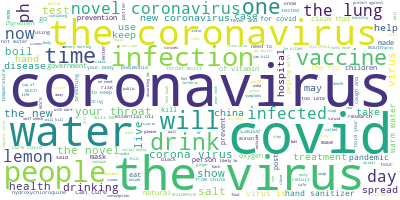

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['final_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

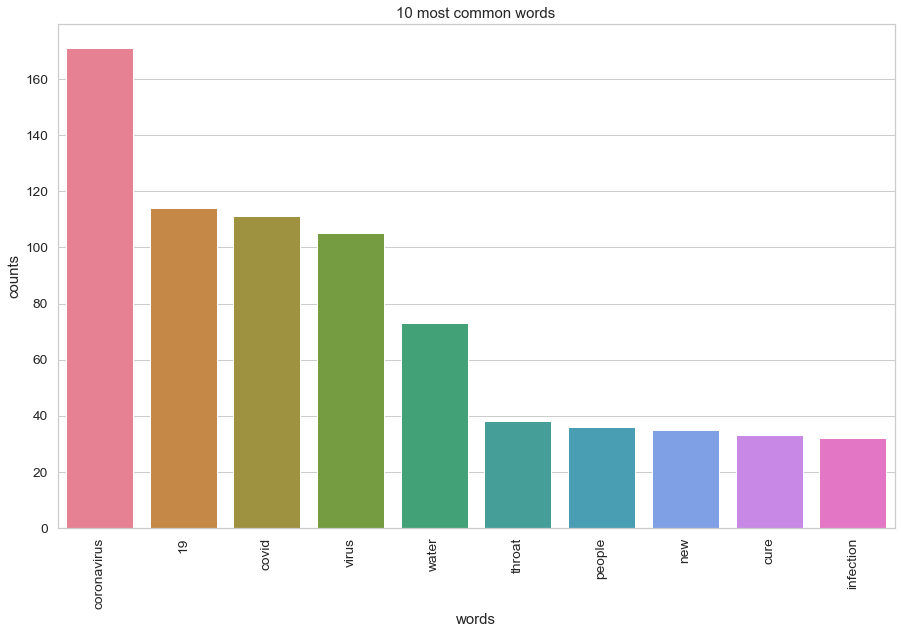

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['final_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)